<a href="https://colab.research.google.com/github/kutayoncuyilmaz/Thesis/blob/main/Twitter_IMDB_Dataset_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Feb 24 12:39:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from bs4 import BeautifulSoup
import random
import re

In [ ]:
cols = ["sentiment", "id", "date", "query", "user", "text"]
data = pd.read_csv(
    "/content/drive/MyDrive/Datasets/training.csv",
    header=None,
    names=cols,
    engine="python",
    encoding="latin1")

In [ ]:
data.drop(["id", "date", "query", "user"],
          axis=1,
          inplace=True)

In [ ]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, "lxml").get_text()
    # Delete the @
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    # Delete URL links
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    # Just keep letters and important punctuation
    tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    # Remove additional spaces
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

In [ ]:
data_clean = [clean_tweet(tweet) for tweet in data.text]

In [ ]:
data['text_final']=data_clean
data.drop('text',axis=1,inplace=True)

In [ ]:
data_labels = data.sentiment.values
data_labels[data_labels == 4] = 1

In [ ]:
data.rename(columns={'text_final':'text'},inplace=True)

In [ ]:
data['totalwords'] = [len(x.split()) for x in data['text'].tolist()]

In [ ]:
data['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [ ]:
data.head()

,sentiment,text,totalwords
0,0,Awww that's a bummer. You shoulda got David C...,16
1,0,is upset that he can't update his Facebook by ...,21
2,0,I dived many times for the ball. Managed to s...,16
3,0,my whole body feels itchy and like its on fire,10
4,0,no it's not behaving at all. i'm mad. why am ...,20


In [ ]:
data['totalwords'].describe()

count    1.600000e+06
mean     1.255081e+01
std      6.881493e+00
min      0.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.800000e+01
max      1.160000e+02
Name: totalwords, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of words')]

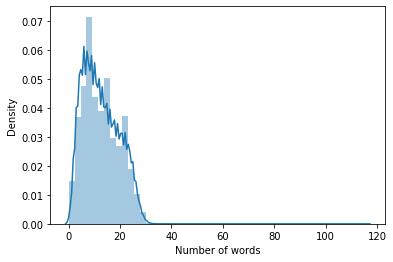

In [ ]:
import seaborn as sns
ax = sns.distplot(data['totalwords'], bins=50)
ax.set(ylabel= 'Density' ,xlabel='Number of words')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
    text = re.sub('\t', ' ',  text)
    text = re.sub(r" +", ' ', text)
    return text

In [ ]:
df['review'] = df['review'].apply(clean_text)

In [ ]:
df['totalwords'] = [len(x.split()) for x in df['review'].tolist()]

In [ ]:
def sentiment2label(sentiment):
    if sentiment == "positive":
        return 1
    else :
        return 0

df['sentiment'] = df['sentiment'].apply(sentiment2label)

In [ ]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of Words')]

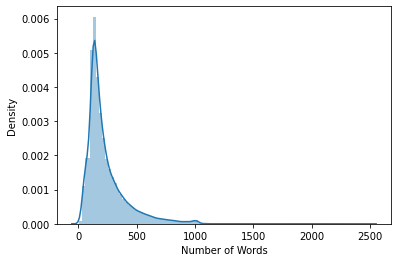

In [ ]:
ax2 = sns.distplot(df['totalwords'],bins=100)
ax2.set(ylabel= 'Density' ,xlabel='Number of Words')

In [ ]:
df['totalwords'].describe()

count    50000.000000
mean       235.130500
std        174.272307
min          4.000000
25%        128.000000
50%        176.000000
75%        286.000000
max       2493.000000
Name: totalwords, dtype: float64